In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 2: Frequency Domain Analysis - Filtering

In this task, we will implement high-pass, low-pass, and band-reject filters using frequency domain analysis.

In [2]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-wbxvn2aa
  Created wheel for ee604-plugins: filename=ee604_plugins-0.3.2-cp36-none-any.whl size=2311 sha256=11972f9b6c94b78b6ac1a25440b915badb6b55c9ff52c98c506a4289639c6d3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-82vu9asy/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-wbxvn2aa


In [3]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import circle as circ

from ee604_plugins import download_dataset, cv2_imshow

download_dataset(assignment_no=3, task_no=2) # download data for this assignment

Download Complete!


In [31]:
def getFrequencyDomainSignal(img):
    '''
    Write a program to extract magnitude and phase spectrum of the input image
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    
    Outputs:
    + mag_spectrum - magnitude spectrum of size N x N
    + phase_spectrum - phase spectrum of size N x N
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + not needed
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    ft = cv2.dft(lena_noisy.astype(np.float32), flags = cv2.DFT_COMPLEX_OUTPUT)
    centered_ft = np.fft.fftshift(ft)
    mag_spectrum = np.sqrt(centered_ft[:, :, 0]**2 + centered_ft[:, :, 1]**2)
    phase_spectrum = np.arctan2(centered_ft[:, :, 1], centered_ft[:, :, 0])

    #############################
    # End your code here ########
    ############################# 
    
    return mag_spectrum, phase_spectrum

In [32]:
def reconstruction(mag_spectrum, phase_spectrum):
    '''
    Write a program to reconstruct the original image using its magnitude and phase spectrum
    
    Inputs:
    + mag_spectrum - magnitude spectrum of size N x N
    + phase_spectrum - phase spectrum of size N x N
    
    Outputs:
    + out_img - reconstructed image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + not needed
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    x = mag_spectrum*np.cos(phase_spectrum)
    y = mag_spectrum*np.sin(phase_spectrum)

    uncentered = np.fft.ifftshift(np.stack((x, y), axis=2))
    image = cv2.idft(uncentered)
    mag_img = np.sqrt(image[:, :, 0]**2 + image[:, :, 1]**2)
    norm_img = (mag_img - np.min(mag_img))/(np.max(mag_img))*255
    out_img = norm_img.astype(np.uint8)
    
    #############################
    # End your code here ########
    ############################# 
    
    return out_img

In [33]:
def applyLPF(img, fc):
    '''
    Write a program to apply an ideal low pass filter (having cutoff frequency 'fc') to the input image.
    You must use frquency domain analysis to do this.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + fc - cutoff frequency 
        - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
    + out_img - filetered image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + use getFrequencyDomainSignal() and reconstruction()
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    m, n = img.shape
    mag, phase = getFrequencyDomainSignal(img)

    mask = np.zeros((m, n))
    mask[m//2 - fc:m//2 + fc, n//2 - fc:n//2 + fc] = 1

    mag = mag*mask
    
    out_img = reconstruction(mag, phase)

    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [34]:
def applyHPF(img, fc):
    '''
    Write a program to apply an ideal high pass filter (having cutoff frequency 'fc') to the input image.
    You must use frquency domain analysis to do this.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + fc - cutoff frequency 
        - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
    + out_img - filetered image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + use getFrequencyDomainSignal() and reconstruction()
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    m, n = img.shape
    mag, phase = getFrequencyDomainSignal(img)

    mask = np.ones((m, n))
    mask[m//2 - fc:m//2 + fc, n//2 - fc:n//2 + fc] = 0
    
    mag = mag*mask
    
    out_img = reconstruction(mag, phase)

    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [35]:
def applyBandRejectFilter(img, fL, fH):
    '''
    Write a program to apply an ideal band reject filter (having cutoff frequency at 'fL' and 'fH')
    to the input image. You must use frquency domain analysis to do this.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + fL & fH - cutoff frequency 
              - 0 < fL < fH < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
    + out_img - filetered image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hint:
    + use getFrequencyDomainSignal() and reconstruction()
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    m, n = img.shape
    mag, phase = getFrequencyDomainSignal(img)

    mask = np.ones((m, n))
    mask[m//2 - fH:m//2 + fH, n//2 - fH:n//2 + fH] = 0
    mask[m//2 - fL:m//2 + fL, n//2 - fL:n//2 + fL] = 1

    mag = mag*mask
    
    out_img = reconstruction(mag, phase)

    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [36]:
# Do not change codes inside this cell

lena_noisy = cv2.imread('data/lena_noisy.jpg', 0)

def plot_frame(gridx, gridy, subplot_id, img, name, axis=False):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    
    if axis == False:
        plt.axis("off")
    plt.title(name)

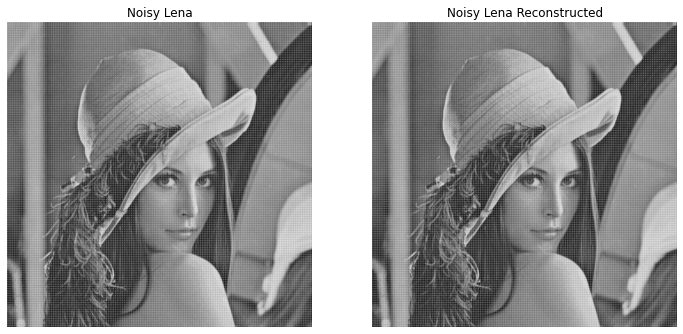

In [37]:
# Test getFrequencyDomainSignal() and reconstruction()
# Make sure the reconstructed image looks similar to the original image

mag_spectrum, phase_spectrum = getFrequencyDomainSignal(lena_noisy)
lena_reconstructed = reconstruction(mag_spectrum, phase_spectrum)

plt.figure(figsize=(12, 6))
plot_frame(1, 2, 0, lena_noisy, "Noisy Lena")
plot_frame(1, 2, 1, lena_reconstructed, "Noisy Lena Reconstructed")

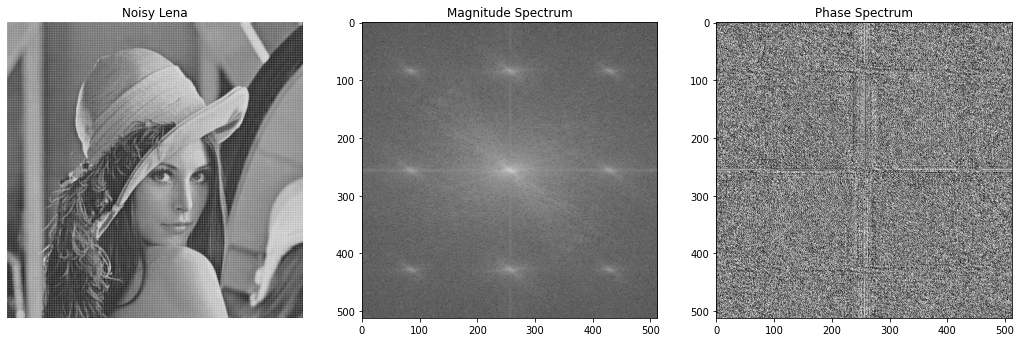

In [38]:
# Do not change codes inside this cell

mag_spectrum, phase_spectrum = getFrequencyDomainSignal(lena_noisy)

plt.figure(figsize=(18, 6))
plot_frame(1, 3, 0, lena_noisy, "Noisy Lena")

tmp = np.log(mag_spectrum)
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 3, 1, tmp, "Magnitude Spectrum", axis=True)

tmp = phase_spectrum
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 3, 2, phase_spectrum, "Phase Spectrum", axis=True)

### Find suitable fL and fH for band reject filter

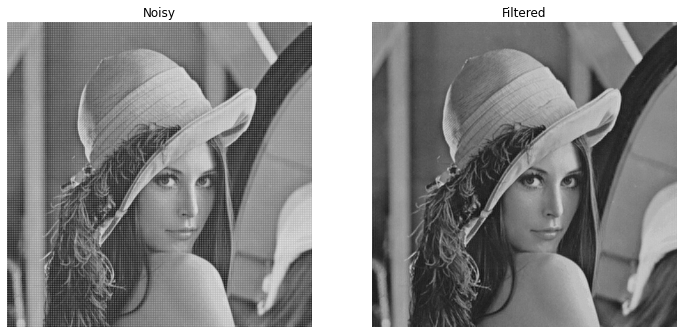

In [39]:
# Have a look at the phase and magnitude spectrum of the image and find a suitable fL and fH for
# a Band reject filter to work

def plot_BRF_output(fL, fH):
    if fL == ".....":
        fL = 1
        fH = int(lena_noisy.shape[0]/2)
        
    lena_filtered = applyBandRejectFilter(lena_noisy, fL, fH)
    plt.figure(figsize=(12, 6))
    plot_frame(1, 2, 0, lena_noisy, "Noisy")
    plot_frame(1, 2, 1, lena_filtered, "Filtered")


#############################
# Your part #################
#############################

# Replace with your value for fL and fH
fL = 150
fH = 185

plot_BRF_output(fL, fH)

### Observations

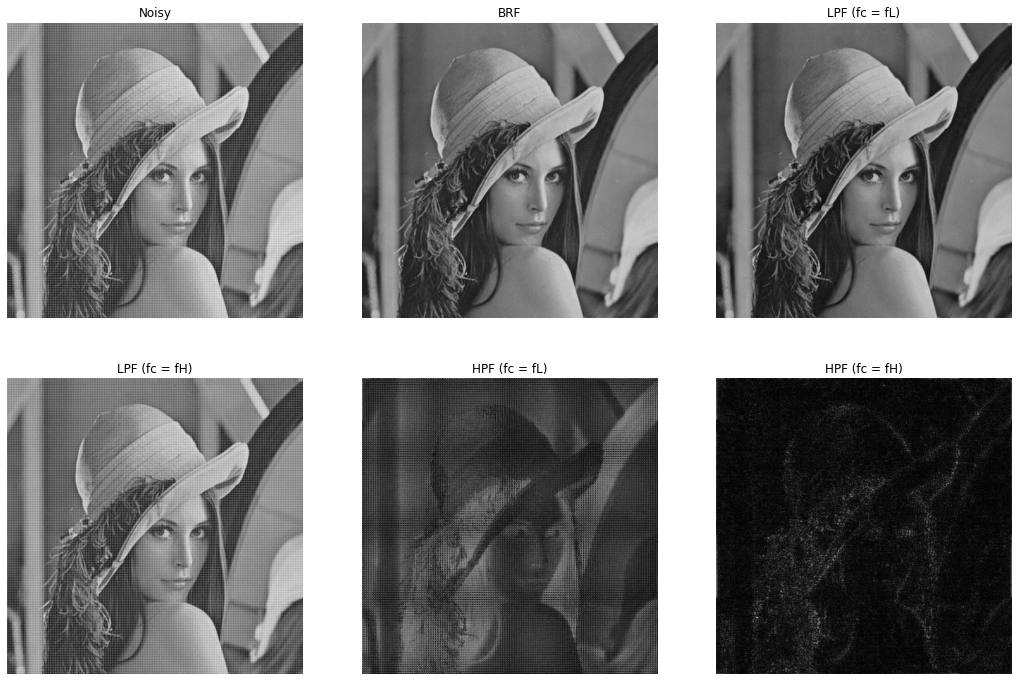

In [40]:
# Do not change codes inside this cell
# Add your observations in next cell

plt.figure(figsize=(18, 12))
plot_frame(2, 3, 0, lena_noisy, "Noisy")

tmp = applyBandRejectFilter(lena_noisy, fL, fH)
plot_frame(2, 3, 1, tmp, "BRF")

tmp = applyLPF(lena_noisy, fL)
plot_frame(2, 3, 2, tmp, "LPF (fc = fL)")

tmp = applyLPF(lena_noisy, fH)
plot_frame(2, 3, 3, tmp, "LPF (fc = fH)")

tmp = applyHPF(lena_noisy, fL)
plot_frame(2, 3, 4, tmp, "HPF (fc = fL)")

tmp = applyHPF(lena_noisy, fH)
plot_frame(2, 3, 5, tmp, "HPF (fc = fH)")

In [42]:
# Add your observations; make sure you compare all the five filtering operations done in the previous cell

your_observation = """
1. The output from the band reject filter looks the clearest since it removes all the noise impulses in the frequency domain while 
retaining maximum amount of the original frequency spectrum.
2. Then the LPF (fc = fL) is next in terms of clarity. It removes the impulses (noise) but it also removes the higher frequency components from the spectrum.
3. The LPF (fc=fH) does not remove the noise impulses and instead removes higher frequency components so it is still noisy.
4. The HPF (fc=fL) keeps only the noise impulses and high frequency components and removes the lower frequency components so it does quite badly and the image loses most of it's content.
5. The HPF (fc=fH) is worst and removes everything except the high frequency components, so minimal aspects of the original image are retained.
"""

print(your_observation)


1. The output from the band reject filter looks the clearest since it removes all the noise impulses in the frequency domain while 
retaining maximum amount of the original frequency spectrum.
2. Then the LPF (fc = fL) is next in terms of clarity. It removes the impulses (noise) but it also removes the higher frequency components from the spectrum.
3. The LPF (fc=fH) does not remove the noise impulses and instead removes higher frequency components so it is still noisy.
4. The HPF (fc=fL) keeps only the noise impulses and high frequency components and removes the lower frequency components so it does quite badly and the image loses most of it's content.
5. The HPF (fc=fH) is worst and removes everything except the high frequency components, so minimal aspects of the original image are retained.

